# Cleaning Script
This notebook takes in the given FMA mp3 files and converts it to wav format. 
It outputs the signal, sampling rate, log mel spectogram, and noisy versions of signal and log mel spectogram. 


In [1]:
%load_ext autoreload
%autoreload 2

In [14]:
from os import path
import os
from pydub import AudioSegment
from scipy.io import wavfile
import librosa
import numpy as np
import math
import pickle
from tqdm import tqdm
import random
import librosa.display

In [3]:
SMALL_AUDIO_DIR = '/scratch/jw6254/unziptest/fma_small'
# !mkdir /scratch/jw6254/unziptest/fma_small_wav
SMALL_OUTPUT_DIR = '/scratch/jw6254/unziptest/fma_small_wav'


In [18]:
# convert all songs to wav files
def convert_files(AUDIO_DIR, OUTPUT_DIR):

    for path in [os.path.join(AUDIO_DIR, p)
                     for p in sorted(os.listdir(AUDIO_DIR))
                     if not (p.endswith('checksums') or p.endswith('.txt') or p.endswith('.DS_Store'))]:
            # Keep Track of the Path
            print(path)
            
            # add all songs to the list
            AUDIO_PATHS = [os.path.join(path, track) for track in os.listdir(path)]

            for song in AUDIO_PATHS:
                dst = os.path.join(OUTPUT_DIR,song.split('/')[-1].split('.')[0]+'.wav')
                try:
#                         print(song, "-->", dst)
                    sound = AudioSegment.from_mp3(song)
                    sound.export(dst, format="wav")
                except:
                    print("break")
                    pass
        

In [19]:
convert_files(SMALL_AUDIO_DIR, SMALL_OUTPUT_DIR)

/scratch/jw6254/unziptest/fma_small/000
/scratch/jw6254/unziptest/fma_small/001
/scratch/jw6254/unziptest/fma_small/002
/scratch/jw6254/unziptest/fma_small/003
/scratch/jw6254/unziptest/fma_small/004
/scratch/jw6254/unziptest/fma_small/005
/scratch/jw6254/unziptest/fma_small/006
/scratch/jw6254/unziptest/fma_small/007
/scratch/jw6254/unziptest/fma_small/008
/scratch/jw6254/unziptest/fma_small/009
/scratch/jw6254/unziptest/fma_small/010
/scratch/jw6254/unziptest/fma_small/011
/scratch/jw6254/unziptest/fma_small/012
/scratch/jw6254/unziptest/fma_small/013
/scratch/jw6254/unziptest/fma_small/014
/scratch/jw6254/unziptest/fma_small/015
/scratch/jw6254/unziptest/fma_small/016
/scratch/jw6254/unziptest/fma_small/017
/scratch/jw6254/unziptest/fma_small/018
/scratch/jw6254/unziptest/fma_small/019
/scratch/jw6254/unziptest/fma_small/020
/scratch/jw6254/unziptest/fma_small/021
/scratch/jw6254/unziptest/fma_small/022
/scratch/jw6254/unziptest/fma_small/023
/scratch/jw6254/unziptest/fma_small/024


# Convert .wav files to Singals and Spectograms

In [4]:
def convert_files_spec(AUDIO_DIR):
    
#     total_wav_path_list = []
    total_log_mel_spec_list = []
    total_librosa_load_and_path_list = []
    
    i = 0
    for path_name in [os.path.join(AUDIO_DIR, p)                       
                         for p in sorted(os.listdir(AUDIO_DIR)) 
                         if not (p.endswith('checksums') or p.endswith('.txt') or p.endswith('.DS_Store'))]:

        print(path_name) 
#         if  i < 2:
        try:
                # Keep Path list to reference later
    #             total_wav_path_list.append(path_name)

            x, sr = librosa.load(path_name, sr=None, mono=True)
            # Keep Librosa Load info (signal and sampling rate)
            total_librosa_load_and_path_list.append([x,sr,path_name])


            stft = np.abs(librosa.stft(x, n_fft=2048, hop_length=512))
            mel = librosa.feature.melspectrogram(sr=sr, S=stft**2)
            log_mel = librosa.amplitude_to_db(mel)
            # Keep the Log Mel Spectogram of each Song
            total_log_mel_spec_list.append(log_mel[:,:2000])


        except:
            print('break')
            pass
#             i+=1
#         else:
#             break
     
    return total_log_mel_spec_list, total_librosa_load_and_path_list

In [5]:
spec_out, lib_out = convert_files_spec(SMALL_OUTPUT_DIR)

/scratch/jw6254/unziptest/fma_small_wav/000002.wav
/scratch/jw6254/unziptest/fma_small_wav/000005.wav
/scratch/jw6254/unziptest/fma_small_wav/000010.wav
/scratch/jw6254/unziptest/fma_small_wav/000140.wav
/scratch/jw6254/unziptest/fma_small_wav/000141.wav
/scratch/jw6254/unziptest/fma_small_wav/000148.wav
/scratch/jw6254/unziptest/fma_small_wav/000182.wav
/scratch/jw6254/unziptest/fma_small_wav/000190.wav
/scratch/jw6254/unziptest/fma_small_wav/000193.wav
/scratch/jw6254/unziptest/fma_small_wav/000194.wav
/scratch/jw6254/unziptest/fma_small_wav/000197.wav
/scratch/jw6254/unziptest/fma_small_wav/000200.wav
/scratch/jw6254/unziptest/fma_small_wav/000203.wav
/scratch/jw6254/unziptest/fma_small_wav/000204.wav
/scratch/jw6254/unziptest/fma_small_wav/000207.wav
/scratch/jw6254/unziptest/fma_small_wav/000210.wav
/scratch/jw6254/unziptest/fma_small_wav/000211.wav
/scratch/jw6254/unziptest/fma_small_wav/000212.wav
/scratch/jw6254/unziptest/fma_small_wav/000213.wav
/scratch/jw6254/unziptest/fma_s

/scratch/jw6254/unziptest/fma_small_wav/003832.wav
/scratch/jw6254/unziptest/fma_small_wav/003833.wav
/scratch/jw6254/unziptest/fma_small_wav/003840.wav
/scratch/jw6254/unziptest/fma_small_wav/003880.wav
/scratch/jw6254/unziptest/fma_small_wav/003895.wav
/scratch/jw6254/unziptest/fma_small_wav/003896.wav
/scratch/jw6254/unziptest/fma_small_wav/003904.wav
/scratch/jw6254/unziptest/fma_small_wav/003905.wav
/scratch/jw6254/unziptest/fma_small_wav/003906.wav
/scratch/jw6254/unziptest/fma_small_wav/003908.wav
/scratch/jw6254/unziptest/fma_small_wav/003909.wav
/scratch/jw6254/unziptest/fma_small_wav/003910.wav
/scratch/jw6254/unziptest/fma_small_wav/003911.wav
/scratch/jw6254/unziptest/fma_small_wav/003912.wav
/scratch/jw6254/unziptest/fma_small_wav/003913.wav
/scratch/jw6254/unziptest/fma_small_wav/003920.wav
/scratch/jw6254/unziptest/fma_small_wav/003921.wav
/scratch/jw6254/unziptest/fma_small_wav/003950.wav
/scratch/jw6254/unziptest/fma_small_wav/004013.wav
/scratch/jw6254/unziptest/fma_s

/scratch/jw6254/unziptest/fma_small_wav/006680.wav
/scratch/jw6254/unziptest/fma_small_wav/006684.wav
/scratch/jw6254/unziptest/fma_small_wav/006762.wav
/scratch/jw6254/unziptest/fma_small_wav/006776.wav
/scratch/jw6254/unziptest/fma_small_wav/006778.wav
/scratch/jw6254/unziptest/fma_small_wav/006779.wav
/scratch/jw6254/unziptest/fma_small_wav/006782.wav
/scratch/jw6254/unziptest/fma_small_wav/006783.wav
/scratch/jw6254/unziptest/fma_small_wav/006788.wav
/scratch/jw6254/unziptest/fma_small_wav/006802.wav
/scratch/jw6254/unziptest/fma_small_wav/006803.wav
/scratch/jw6254/unziptest/fma_small_wav/006854.wav
/scratch/jw6254/unziptest/fma_small_wav/006855.wav
/scratch/jw6254/unziptest/fma_small_wav/006856.wav
/scratch/jw6254/unziptest/fma_small_wav/006857.wav
/scratch/jw6254/unziptest/fma_small_wav/007011.wav
/scratch/jw6254/unziptest/fma_small_wav/007373.wav
/scratch/jw6254/unziptest/fma_small_wav/007374.wav
/scratch/jw6254/unziptest/fma_small_wav/007375.wav
/scratch/jw6254/unziptest/fma_s

/scratch/jw6254/unziptest/fma_small_wav/011261.wav
/scratch/jw6254/unziptest/fma_small_wav/011262.wav
/scratch/jw6254/unziptest/fma_small_wav/011264.wav
/scratch/jw6254/unziptest/fma_small_wav/011268.wav
/scratch/jw6254/unziptest/fma_small_wav/011298.wav
/scratch/jw6254/unziptest/fma_small_wav/011299.wav
/scratch/jw6254/unziptest/fma_small_wav/011306.wav
/scratch/jw6254/unziptest/fma_small_wav/011333.wav
/scratch/jw6254/unziptest/fma_small_wav/011334.wav
/scratch/jw6254/unziptest/fma_small_wav/011503.wav
/scratch/jw6254/unziptest/fma_small_wav/011504.wav
/scratch/jw6254/unziptest/fma_small_wav/011505.wav
/scratch/jw6254/unziptest/fma_small_wav/011508.wav
/scratch/jw6254/unziptest/fma_small_wav/011544.wav
/scratch/jw6254/unziptest/fma_small_wav/011638.wav
/scratch/jw6254/unziptest/fma_small_wav/011671.wav
/scratch/jw6254/unziptest/fma_small_wav/011672.wav
/scratch/jw6254/unziptest/fma_small_wav/011673.wav
/scratch/jw6254/unziptest/fma_small_wav/011674.wav
/scratch/jw6254/unziptest/fma_s

/scratch/jw6254/unziptest/fma_small_wav/013561.wav
/scratch/jw6254/unziptest/fma_small_wav/013562.wav
/scratch/jw6254/unziptest/fma_small_wav/013566.wav
/scratch/jw6254/unziptest/fma_small_wav/013571.wav
/scratch/jw6254/unziptest/fma_small_wav/013578.wav
/scratch/jw6254/unziptest/fma_small_wav/013591.wav
/scratch/jw6254/unziptest/fma_small_wav/013596.wav
/scratch/jw6254/unziptest/fma_small_wav/013666.wav
/scratch/jw6254/unziptest/fma_small_wav/013668.wav
/scratch/jw6254/unziptest/fma_small_wav/013670.wav
/scratch/jw6254/unziptest/fma_small_wav/013706.wav
/scratch/jw6254/unziptest/fma_small_wav/013707.wav
/scratch/jw6254/unziptest/fma_small_wav/013708.wav
/scratch/jw6254/unziptest/fma_small_wav/013709.wav
/scratch/jw6254/unziptest/fma_small_wav/013710.wav
/scratch/jw6254/unziptest/fma_small_wav/013711.wav
/scratch/jw6254/unziptest/fma_small_wav/013735.wav
/scratch/jw6254/unziptest/fma_small_wav/013747.wav
/scratch/jw6254/unziptest/fma_small_wav/013748.wav
/scratch/jw6254/unziptest/fma_s

/scratch/jw6254/unziptest/fma_small_wav/017884.wav
/scratch/jw6254/unziptest/fma_small_wav/017906.wav
/scratch/jw6254/unziptest/fma_small_wav/018031.wav
/scratch/jw6254/unziptest/fma_small_wav/018032.wav
/scratch/jw6254/unziptest/fma_small_wav/018033.wav
/scratch/jw6254/unziptest/fma_small_wav/018034.wav
/scratch/jw6254/unziptest/fma_small_wav/018037.wav
/scratch/jw6254/unziptest/fma_small_wav/018038.wav
/scratch/jw6254/unziptest/fma_small_wav/018039.wav
/scratch/jw6254/unziptest/fma_small_wav/018043.wav
/scratch/jw6254/unziptest/fma_small_wav/018044.wav
/scratch/jw6254/unziptest/fma_small_wav/018112.wav
/scratch/jw6254/unziptest/fma_small_wav/018124.wav
/scratch/jw6254/unziptest/fma_small_wav/018144.wav
/scratch/jw6254/unziptest/fma_small_wav/018145.wav
/scratch/jw6254/unziptest/fma_small_wav/018146.wav
/scratch/jw6254/unziptest/fma_small_wav/018159.wav
/scratch/jw6254/unziptest/fma_small_wav/018197.wav
/scratch/jw6254/unziptest/fma_small_wav/018350.wav
/scratch/jw6254/unziptest/fma_s

/scratch/jw6254/unziptest/fma_small_wav/024369.wav
/scratch/jw6254/unziptest/fma_small_wav/024370.wav
/scratch/jw6254/unziptest/fma_small_wav/024371.wav
/scratch/jw6254/unziptest/fma_small_wav/024418.wav
/scratch/jw6254/unziptest/fma_small_wav/024420.wav
/scratch/jw6254/unziptest/fma_small_wav/024421.wav
/scratch/jw6254/unziptest/fma_small_wav/024422.wav
/scratch/jw6254/unziptest/fma_small_wav/024423.wav
/scratch/jw6254/unziptest/fma_small_wav/024424.wav
/scratch/jw6254/unziptest/fma_small_wav/024425.wav
/scratch/jw6254/unziptest/fma_small_wav/024426.wav
/scratch/jw6254/unziptest/fma_small_wav/024427.wav
/scratch/jw6254/unziptest/fma_small_wav/024428.wav
/scratch/jw6254/unziptest/fma_small_wav/024429.wav
/scratch/jw6254/unziptest/fma_small_wav/024430.wav
/scratch/jw6254/unziptest/fma_small_wav/024431.wav
/scratch/jw6254/unziptest/fma_small_wav/024432.wav
/scratch/jw6254/unziptest/fma_small_wav/024512.wav
/scratch/jw6254/unziptest/fma_small_wav/024515.wav
/scratch/jw6254/unziptest/fma_s

/scratch/jw6254/unziptest/fma_small_wav/027798.wav
/scratch/jw6254/unziptest/fma_small_wav/027799.wav
/scratch/jw6254/unziptest/fma_small_wav/027802.wav
/scratch/jw6254/unziptest/fma_small_wav/027803.wav
/scratch/jw6254/unziptest/fma_small_wav/027804.wav
/scratch/jw6254/unziptest/fma_small_wav/027805.wav
/scratch/jw6254/unziptest/fma_small_wav/027855.wav
/scratch/jw6254/unziptest/fma_small_wav/027856.wav
/scratch/jw6254/unziptest/fma_small_wav/027866.wav
/scratch/jw6254/unziptest/fma_small_wav/027945.wav
/scratch/jw6254/unziptest/fma_small_wav/027953.wav
/scratch/jw6254/unziptest/fma_small_wav/027975.wav
/scratch/jw6254/unziptest/fma_small_wav/027978.wav
/scratch/jw6254/unziptest/fma_small_wav/027981.wav
/scratch/jw6254/unziptest/fma_small_wav/027987.wav
/scratch/jw6254/unziptest/fma_small_wav/028070.wav
/scratch/jw6254/unziptest/fma_small_wav/028072.wav
/scratch/jw6254/unziptest/fma_small_wav/028179.wav
/scratch/jw6254/unziptest/fma_small_wav/028241.wav
/scratch/jw6254/unziptest/fma_s

/scratch/jw6254/unziptest/fma_small_wav/032695.wav
/scratch/jw6254/unziptest/fma_small_wav/032755.wav
/scratch/jw6254/unziptest/fma_small_wav/032756.wav
/scratch/jw6254/unziptest/fma_small_wav/032759.wav
/scratch/jw6254/unziptest/fma_small_wav/032760.wav
/scratch/jw6254/unziptest/fma_small_wav/032800.wav
/scratch/jw6254/unziptest/fma_small_wav/032882.wav
/scratch/jw6254/unziptest/fma_small_wav/033020.wav
/scratch/jw6254/unziptest/fma_small_wav/033049.wav
/scratch/jw6254/unziptest/fma_small_wav/033050.wav
/scratch/jw6254/unziptest/fma_small_wav/033064.wav
/scratch/jw6254/unziptest/fma_small_wav/033067.wav
/scratch/jw6254/unziptest/fma_small_wav/033068.wav
/scratch/jw6254/unziptest/fma_small_wav/033069.wav
/scratch/jw6254/unziptest/fma_small_wav/033070.wav
/scratch/jw6254/unziptest/fma_small_wav/033071.wav
/scratch/jw6254/unziptest/fma_small_wav/033072.wav
/scratch/jw6254/unziptest/fma_small_wav/033123.wav
/scratch/jw6254/unziptest/fma_small_wav/033124.wav
/scratch/jw6254/unziptest/fma_s

/scratch/jw6254/unziptest/fma_small_wav/038354.wav
/scratch/jw6254/unziptest/fma_small_wav/038361.wav
/scratch/jw6254/unziptest/fma_small_wav/038362.wav
/scratch/jw6254/unziptest/fma_small_wav/038363.wav
/scratch/jw6254/unziptest/fma_small_wav/038365.wav
/scratch/jw6254/unziptest/fma_small_wav/038399.wav
/scratch/jw6254/unziptest/fma_small_wav/038435.wav
/scratch/jw6254/unziptest/fma_small_wav/038450.wav
/scratch/jw6254/unziptest/fma_small_wav/038522.wav
/scratch/jw6254/unziptest/fma_small_wav/038557.wav
/scratch/jw6254/unziptest/fma_small_wav/038560.wav
/scratch/jw6254/unziptest/fma_small_wav/038775.wav
/scratch/jw6254/unziptest/fma_small_wav/038776.wav
/scratch/jw6254/unziptest/fma_small_wav/038777.wav
/scratch/jw6254/unziptest/fma_small_wav/038778.wav
/scratch/jw6254/unziptest/fma_small_wav/038779.wav
/scratch/jw6254/unziptest/fma_small_wav/038780.wav
/scratch/jw6254/unziptest/fma_small_wav/038781.wav
/scratch/jw6254/unziptest/fma_small_wav/038782.wav
/scratch/jw6254/unziptest/fma_s

/scratch/jw6254/unziptest/fma_small_wav/041019.wav
/scratch/jw6254/unziptest/fma_small_wav/041020.wav
/scratch/jw6254/unziptest/fma_small_wav/041054.wav
/scratch/jw6254/unziptest/fma_small_wav/041095.wav
/scratch/jw6254/unziptest/fma_small_wav/041147.wav
/scratch/jw6254/unziptest/fma_small_wav/041191.wav
/scratch/jw6254/unziptest/fma_small_wav/041192.wav
/scratch/jw6254/unziptest/fma_small_wav/041310.wav
/scratch/jw6254/unziptest/fma_small_wav/041381.wav
/scratch/jw6254/unziptest/fma_small_wav/041568.wav
/scratch/jw6254/unziptest/fma_small_wav/041570.wav
/scratch/jw6254/unziptest/fma_small_wav/041573.wav
/scratch/jw6254/unziptest/fma_small_wav/041605.wav
/scratch/jw6254/unziptest/fma_small_wav/041709.wav
/scratch/jw6254/unziptest/fma_small_wav/041714.wav
/scratch/jw6254/unziptest/fma_small_wav/041812.wav
/scratch/jw6254/unziptest/fma_small_wav/041819.wav
/scratch/jw6254/unziptest/fma_small_wav/041820.wav
/scratch/jw6254/unziptest/fma_small_wav/041825.wav
/scratch/jw6254/unziptest/fma_s

/scratch/jw6254/unziptest/fma_small_wav/044342.wav
/scratch/jw6254/unziptest/fma_small_wav/044347.wav
/scratch/jw6254/unziptest/fma_small_wav/044354.wav
/scratch/jw6254/unziptest/fma_small_wav/044355.wav
/scratch/jw6254/unziptest/fma_small_wav/044777.wav
/scratch/jw6254/unziptest/fma_small_wav/044778.wav
/scratch/jw6254/unziptest/fma_small_wav/044779.wav
/scratch/jw6254/unziptest/fma_small_wav/044780.wav
/scratch/jw6254/unziptest/fma_small_wav/044781.wav
/scratch/jw6254/unziptest/fma_small_wav/044782.wav
/scratch/jw6254/unziptest/fma_small_wav/044791.wav
/scratch/jw6254/unziptest/fma_small_wav/044792.wav
/scratch/jw6254/unziptest/fma_small_wav/044793.wav
/scratch/jw6254/unziptest/fma_small_wav/044794.wav
/scratch/jw6254/unziptest/fma_small_wav/044795.wav
/scratch/jw6254/unziptest/fma_small_wav/044796.wav
/scratch/jw6254/unziptest/fma_small_wav/044797.wav
/scratch/jw6254/unziptest/fma_small_wav/044798.wav
/scratch/jw6254/unziptest/fma_small_wav/044799.wav
/scratch/jw6254/unziptest/fma_s

/scratch/jw6254/unziptest/fma_small_wav/047671.wav
/scratch/jw6254/unziptest/fma_small_wav/047707.wav
/scratch/jw6254/unziptest/fma_small_wav/047826.wav
/scratch/jw6254/unziptest/fma_small_wav/047835.wav
/scratch/jw6254/unziptest/fma_small_wav/047865.wav
/scratch/jw6254/unziptest/fma_small_wav/047868.wav
/scratch/jw6254/unziptest/fma_small_wav/047894.wav
/scratch/jw6254/unziptest/fma_small_wav/047895.wav
/scratch/jw6254/unziptest/fma_small_wav/047896.wav
/scratch/jw6254/unziptest/fma_small_wav/047897.wav
/scratch/jw6254/unziptest/fma_small_wav/047916.wav
/scratch/jw6254/unziptest/fma_small_wav/047921.wav
/scratch/jw6254/unziptest/fma_small_wav/048015.wav
/scratch/jw6254/unziptest/fma_small_wav/048042.wav
/scratch/jw6254/unziptest/fma_small_wav/048043.wav
/scratch/jw6254/unziptest/fma_small_wav/048044.wav
/scratch/jw6254/unziptest/fma_small_wav/048046.wav
/scratch/jw6254/unziptest/fma_small_wav/048269.wav
/scratch/jw6254/unziptest/fma_small_wav/048293.wav
/scratch/jw6254/unziptest/fma_s

/scratch/jw6254/unziptest/fma_small_wav/051998.wav
/scratch/jw6254/unziptest/fma_small_wav/051999.wav
/scratch/jw6254/unziptest/fma_small_wav/052000.wav
/scratch/jw6254/unziptest/fma_small_wav/052001.wav
/scratch/jw6254/unziptest/fma_small_wav/052034.wav
/scratch/jw6254/unziptest/fma_small_wav/052035.wav
/scratch/jw6254/unziptest/fma_small_wav/052036.wav
/scratch/jw6254/unziptest/fma_small_wav/052037.wav
/scratch/jw6254/unziptest/fma_small_wav/052039.wav
/scratch/jw6254/unziptest/fma_small_wav/052040.wav
/scratch/jw6254/unziptest/fma_small_wav/052041.wav
/scratch/jw6254/unziptest/fma_small_wav/052042.wav
/scratch/jw6254/unziptest/fma_small_wav/052044.wav
/scratch/jw6254/unziptest/fma_small_wav/052045.wav
/scratch/jw6254/unziptest/fma_small_wav/052118.wav
/scratch/jw6254/unziptest/fma_small_wav/052119.wav
/scratch/jw6254/unziptest/fma_small_wav/052120.wav
/scratch/jw6254/unziptest/fma_small_wav/052121.wav
/scratch/jw6254/unziptest/fma_small_wav/052122.wav
/scratch/jw6254/unziptest/fma_s

/scratch/jw6254/unziptest/fma_small_wav/054479.wav
/scratch/jw6254/unziptest/fma_small_wav/054480.wav
/scratch/jw6254/unziptest/fma_small_wav/054481.wav
/scratch/jw6254/unziptest/fma_small_wav/054482.wav
/scratch/jw6254/unziptest/fma_small_wav/054496.wav
/scratch/jw6254/unziptest/fma_small_wav/054554.wav
/scratch/jw6254/unziptest/fma_small_wav/054568.wav
/scratch/jw6254/unziptest/fma_small_wav/054570.wav
/scratch/jw6254/unziptest/fma_small_wav/054576.wav
/scratch/jw6254/unziptest/fma_small_wav/054578.wav
/scratch/jw6254/unziptest/fma_small_wav/054580.wav
/scratch/jw6254/unziptest/fma_small_wav/054621.wav
/scratch/jw6254/unziptest/fma_small_wav/054623.wav
/scratch/jw6254/unziptest/fma_small_wav/054624.wav
/scratch/jw6254/unziptest/fma_small_wav/054625.wav
/scratch/jw6254/unziptest/fma_small_wav/054626.wav
/scratch/jw6254/unziptest/fma_small_wav/054662.wav
/scratch/jw6254/unziptest/fma_small_wav/054664.wav
/scratch/jw6254/unziptest/fma_small_wav/054665.wav
/scratch/jw6254/unziptest/fma_s

/scratch/jw6254/unziptest/fma_small_wav/056797.wav
/scratch/jw6254/unziptest/fma_small_wav/056798.wav
/scratch/jw6254/unziptest/fma_small_wav/056799.wav
/scratch/jw6254/unziptest/fma_small_wav/056800.wav
/scratch/jw6254/unziptest/fma_small_wav/056801.wav
/scratch/jw6254/unziptest/fma_small_wav/056802.wav
/scratch/jw6254/unziptest/fma_small_wav/056803.wav
/scratch/jw6254/unziptest/fma_small_wav/056804.wav
/scratch/jw6254/unziptest/fma_small_wav/056805.wav
/scratch/jw6254/unziptest/fma_small_wav/056874.wav
/scratch/jw6254/unziptest/fma_small_wav/056888.wav
/scratch/jw6254/unziptest/fma_small_wav/056895.wav
/scratch/jw6254/unziptest/fma_small_wav/056929.wav
/scratch/jw6254/unziptest/fma_small_wav/057078.wav
/scratch/jw6254/unziptest/fma_small_wav/057164.wav
/scratch/jw6254/unziptest/fma_small_wav/057175.wav
/scratch/jw6254/unziptest/fma_small_wav/057176.wav
/scratch/jw6254/unziptest/fma_small_wav/057177.wav
/scratch/jw6254/unziptest/fma_small_wav/057178.wav
/scratch/jw6254/unziptest/fma_s

/scratch/jw6254/unziptest/fma_small_wav/059876.wav
/scratch/jw6254/unziptest/fma_small_wav/059930.wav
/scratch/jw6254/unziptest/fma_small_wav/060037.wav
/scratch/jw6254/unziptest/fma_small_wav/060038.wav
/scratch/jw6254/unziptest/fma_small_wav/060041.wav
/scratch/jw6254/unziptest/fma_small_wav/060042.wav
/scratch/jw6254/unziptest/fma_small_wav/060045.wav
/scratch/jw6254/unziptest/fma_small_wav/060048.wav
/scratch/jw6254/unziptest/fma_small_wav/060074.wav
/scratch/jw6254/unziptest/fma_small_wav/060143.wav
/scratch/jw6254/unziptest/fma_small_wav/060144.wav
/scratch/jw6254/unziptest/fma_small_wav/060145.wav
/scratch/jw6254/unziptest/fma_small_wav/060146.wav
/scratch/jw6254/unziptest/fma_small_wav/060170.wav
/scratch/jw6254/unziptest/fma_small_wav/060317.wav
/scratch/jw6254/unziptest/fma_small_wav/060331.wav
/scratch/jw6254/unziptest/fma_small_wav/060472.wav
/scratch/jw6254/unziptest/fma_small_wav/060474.wav
/scratch/jw6254/unziptest/fma_small_wav/060476.wav
/scratch/jw6254/unziptest/fma_s

/scratch/jw6254/unziptest/fma_small_wav/063291.wav
/scratch/jw6254/unziptest/fma_small_wav/063292.wav
/scratch/jw6254/unziptest/fma_small_wav/063456.wav
/scratch/jw6254/unziptest/fma_small_wav/063457.wav
/scratch/jw6254/unziptest/fma_small_wav/063470.wav
/scratch/jw6254/unziptest/fma_small_wav/063471.wav
/scratch/jw6254/unziptest/fma_small_wav/063472.wav
/scratch/jw6254/unziptest/fma_small_wav/063626.wav
/scratch/jw6254/unziptest/fma_small_wav/063655.wav
/scratch/jw6254/unziptest/fma_small_wav/063733.wav
/scratch/jw6254/unziptest/fma_small_wav/063747.wav
/scratch/jw6254/unziptest/fma_small_wav/063755.wav
/scratch/jw6254/unziptest/fma_small_wav/063757.wav
/scratch/jw6254/unziptest/fma_small_wav/063770.wav
/scratch/jw6254/unziptest/fma_small_wav/063789.wav
/scratch/jw6254/unziptest/fma_small_wav/063803.wav
/scratch/jw6254/unziptest/fma_small_wav/063804.wav
/scratch/jw6254/unziptest/fma_small_wav/063805.wav
/scratch/jw6254/unziptest/fma_small_wav/063874.wav
/scratch/jw6254/unziptest/fma_s

/scratch/jw6254/unziptest/fma_small_wav/066636.wav
/scratch/jw6254/unziptest/fma_small_wav/066637.wav
/scratch/jw6254/unziptest/fma_small_wav/066638.wav
/scratch/jw6254/unziptest/fma_small_wav/066641.wav
/scratch/jw6254/unziptest/fma_small_wav/066643.wav
/scratch/jw6254/unziptest/fma_small_wav/066644.wav
/scratch/jw6254/unziptest/fma_small_wav/066646.wav
/scratch/jw6254/unziptest/fma_small_wav/066648.wav
/scratch/jw6254/unziptest/fma_small_wav/066649.wav
/scratch/jw6254/unziptest/fma_small_wav/066650.wav
/scratch/jw6254/unziptest/fma_small_wav/066689.wav
/scratch/jw6254/unziptest/fma_small_wav/066690.wav
/scratch/jw6254/unziptest/fma_small_wav/066717.wav
/scratch/jw6254/unziptest/fma_small_wav/066757.wav
/scratch/jw6254/unziptest/fma_small_wav/066782.wav
/scratch/jw6254/unziptest/fma_small_wav/066783.wav
/scratch/jw6254/unziptest/fma_small_wav/067007.wav
/scratch/jw6254/unziptest/fma_small_wav/067010.wav
/scratch/jw6254/unziptest/fma_small_wav/067011.wav
/scratch/jw6254/unziptest/fma_s

/scratch/jw6254/unziptest/fma_small_wav/069555.wav
/scratch/jw6254/unziptest/fma_small_wav/069561.wav
/scratch/jw6254/unziptest/fma_small_wav/069563.wav
/scratch/jw6254/unziptest/fma_small_wav/069564.wav
/scratch/jw6254/unziptest/fma_small_wav/069567.wav
/scratch/jw6254/unziptest/fma_small_wav/069682.wav
/scratch/jw6254/unziptest/fma_small_wav/069723.wav
/scratch/jw6254/unziptest/fma_small_wav/069726.wav
/scratch/jw6254/unziptest/fma_small_wav/069727.wav
/scratch/jw6254/unziptest/fma_small_wav/069732.wav
/scratch/jw6254/unziptest/fma_small_wav/069744.wav
/scratch/jw6254/unziptest/fma_small_wav/069745.wav
/scratch/jw6254/unziptest/fma_small_wav/069746.wav
/scratch/jw6254/unziptest/fma_small_wav/069747.wav
/scratch/jw6254/unziptest/fma_small_wav/069761.wav
/scratch/jw6254/unziptest/fma_small_wav/069762.wav
/scratch/jw6254/unziptest/fma_small_wav/069763.wav
/scratch/jw6254/unziptest/fma_small_wav/069764.wav
/scratch/jw6254/unziptest/fma_small_wav/069765.wav
/scratch/jw6254/unziptest/fma_s

/scratch/jw6254/unziptest/fma_small_wav/072075.wav
/scratch/jw6254/unziptest/fma_small_wav/072076.wav
/scratch/jw6254/unziptest/fma_small_wav/072129.wav
/scratch/jw6254/unziptest/fma_small_wav/072130.wav
/scratch/jw6254/unziptest/fma_small_wav/072131.wav
/scratch/jw6254/unziptest/fma_small_wav/072134.wav
/scratch/jw6254/unziptest/fma_small_wav/072135.wav
/scratch/jw6254/unziptest/fma_small_wav/072136.wav
/scratch/jw6254/unziptest/fma_small_wav/072146.wav
/scratch/jw6254/unziptest/fma_small_wav/072149.wav
/scratch/jw6254/unziptest/fma_small_wav/072200.wav
/scratch/jw6254/unziptest/fma_small_wav/072206.wav
/scratch/jw6254/unziptest/fma_small_wav/072210.wav
/scratch/jw6254/unziptest/fma_small_wav/072215.wav
/scratch/jw6254/unziptest/fma_small_wav/072232.wav
/scratch/jw6254/unziptest/fma_small_wav/072233.wav
/scratch/jw6254/unziptest/fma_small_wav/072234.wav
/scratch/jw6254/unziptest/fma_small_wav/072287.wav
/scratch/jw6254/unziptest/fma_small_wav/072288.wav
/scratch/jw6254/unziptest/fma_s

/scratch/jw6254/unziptest/fma_small_wav/074391.wav
/scratch/jw6254/unziptest/fma_small_wav/074392.wav
/scratch/jw6254/unziptest/fma_small_wav/074393.wav
/scratch/jw6254/unziptest/fma_small_wav/074421.wav
/scratch/jw6254/unziptest/fma_small_wav/074445.wav
/scratch/jw6254/unziptest/fma_small_wav/074546.wav
/scratch/jw6254/unziptest/fma_small_wav/074669.wav
/scratch/jw6254/unziptest/fma_small_wav/074671.wav
/scratch/jw6254/unziptest/fma_small_wav/074706.wav
/scratch/jw6254/unziptest/fma_small_wav/074908.wav
/scratch/jw6254/unziptest/fma_small_wav/074937.wav
/scratch/jw6254/unziptest/fma_small_wav/074942.wav
/scratch/jw6254/unziptest/fma_small_wav/074945.wav
/scratch/jw6254/unziptest/fma_small_wav/074954.wav
/scratch/jw6254/unziptest/fma_small_wav/074955.wav
/scratch/jw6254/unziptest/fma_small_wav/074959.wav
/scratch/jw6254/unziptest/fma_small_wav/074960.wav
/scratch/jw6254/unziptest/fma_small_wav/075194.wav
/scratch/jw6254/unziptest/fma_small_wav/075211.wav
/scratch/jw6254/unziptest/fma_s

/scratch/jw6254/unziptest/fma_small_wav/078851.wav
/scratch/jw6254/unziptest/fma_small_wav/078852.wav
/scratch/jw6254/unziptest/fma_small_wav/078984.wav
/scratch/jw6254/unziptest/fma_small_wav/078998.wav
/scratch/jw6254/unziptest/fma_small_wav/079087.wav
/scratch/jw6254/unziptest/fma_small_wav/079575.wav
/scratch/jw6254/unziptest/fma_small_wav/079593.wav
/scratch/jw6254/unziptest/fma_small_wav/079605.wav
/scratch/jw6254/unziptest/fma_small_wav/079606.wav
/scratch/jw6254/unziptest/fma_small_wav/079610.wav
/scratch/jw6254/unziptest/fma_small_wav/079616.wav
/scratch/jw6254/unziptest/fma_small_wav/079741.wav
/scratch/jw6254/unziptest/fma_small_wav/079973.wav
/scratch/jw6254/unziptest/fma_small_wav/079975.wav
/scratch/jw6254/unziptest/fma_small_wav/079977.wav
/scratch/jw6254/unziptest/fma_small_wav/079978.wav
/scratch/jw6254/unziptest/fma_small_wav/079985.wav
/scratch/jw6254/unziptest/fma_small_wav/079986.wav
/scratch/jw6254/unziptest/fma_small_wav/079988.wav
/scratch/jw6254/unziptest/fma_s

/scratch/jw6254/unziptest/fma_small_wav/083789.wav
/scratch/jw6254/unziptest/fma_small_wav/083790.wav
/scratch/jw6254/unziptest/fma_small_wav/083791.wav
/scratch/jw6254/unziptest/fma_small_wav/083898.wav
/scratch/jw6254/unziptest/fma_small_wav/083903.wav
/scratch/jw6254/unziptest/fma_small_wav/083906.wav
/scratch/jw6254/unziptest/fma_small_wav/083908.wav
/scratch/jw6254/unziptest/fma_small_wav/083911.wav
/scratch/jw6254/unziptest/fma_small_wav/083913.wav
/scratch/jw6254/unziptest/fma_small_wav/083954.wav
/scratch/jw6254/unziptest/fma_small_wav/083960.wav
/scratch/jw6254/unziptest/fma_small_wav/083969.wav
/scratch/jw6254/unziptest/fma_small_wav/084009.wav
/scratch/jw6254/unziptest/fma_small_wav/084054.wav
/scratch/jw6254/unziptest/fma_small_wav/084055.wav
/scratch/jw6254/unziptest/fma_small_wav/084056.wav
/scratch/jw6254/unziptest/fma_small_wav/084057.wav
/scratch/jw6254/unziptest/fma_small_wav/084058.wav
/scratch/jw6254/unziptest/fma_small_wav/084091.wav
/scratch/jw6254/unziptest/fma_s

/scratch/jw6254/unziptest/fma_small_wav/086417.wav
/scratch/jw6254/unziptest/fma_small_wav/086419.wav
/scratch/jw6254/unziptest/fma_small_wav/086441.wav
/scratch/jw6254/unziptest/fma_small_wav/086443.wav
/scratch/jw6254/unziptest/fma_small_wav/086481.wav
/scratch/jw6254/unziptest/fma_small_wav/086482.wav
/scratch/jw6254/unziptest/fma_small_wav/086483.wav
/scratch/jw6254/unziptest/fma_small_wav/086484.wav
/scratch/jw6254/unziptest/fma_small_wav/086485.wav
/scratch/jw6254/unziptest/fma_small_wav/086486.wav
/scratch/jw6254/unziptest/fma_small_wav/086487.wav
/scratch/jw6254/unziptest/fma_small_wav/086562.wav
/scratch/jw6254/unziptest/fma_small_wav/086576.wav
/scratch/jw6254/unziptest/fma_small_wav/086623.wav
/scratch/jw6254/unziptest/fma_small_wav/086634.wav
/scratch/jw6254/unziptest/fma_small_wav/086678.wav
/scratch/jw6254/unziptest/fma_small_wav/086679.wav
/scratch/jw6254/unziptest/fma_small_wav/086680.wav
/scratch/jw6254/unziptest/fma_small_wav/086720.wav
/scratch/jw6254/unziptest/fma_s

/scratch/jw6254/unziptest/fma_small_wav/090526.wav
/scratch/jw6254/unziptest/fma_small_wav/090527.wav
/scratch/jw6254/unziptest/fma_small_wav/090529.wav
/scratch/jw6254/unziptest/fma_small_wav/090530.wav
/scratch/jw6254/unziptest/fma_small_wav/090570.wav
/scratch/jw6254/unziptest/fma_small_wav/090579.wav
/scratch/jw6254/unziptest/fma_small_wav/090582.wav
/scratch/jw6254/unziptest/fma_small_wav/090583.wav
/scratch/jw6254/unziptest/fma_small_wav/090587.wav
/scratch/jw6254/unziptest/fma_small_wav/090589.wav
/scratch/jw6254/unziptest/fma_small_wav/090590.wav
/scratch/jw6254/unziptest/fma_small_wav/090591.wav
/scratch/jw6254/unziptest/fma_small_wav/090592.wav
/scratch/jw6254/unziptest/fma_small_wav/090616.wav
/scratch/jw6254/unziptest/fma_small_wav/090617.wav
/scratch/jw6254/unziptest/fma_small_wav/090618.wav
/scratch/jw6254/unziptest/fma_small_wav/090625.wav
/scratch/jw6254/unziptest/fma_small_wav/090639.wav
/scratch/jw6254/unziptest/fma_small_wav/090652.wav
/scratch/jw6254/unziptest/fma_s

/scratch/jw6254/unziptest/fma_small_wav/093364.wav
/scratch/jw6254/unziptest/fma_small_wav/093518.wav
/scratch/jw6254/unziptest/fma_small_wav/093519.wav
/scratch/jw6254/unziptest/fma_small_wav/093520.wav
/scratch/jw6254/unziptest/fma_small_wav/093521.wav
/scratch/jw6254/unziptest/fma_small_wav/093522.wav
/scratch/jw6254/unziptest/fma_small_wav/093523.wav
/scratch/jw6254/unziptest/fma_small_wav/093704.wav
/scratch/jw6254/unziptest/fma_small_wav/093710.wav
/scratch/jw6254/unziptest/fma_small_wav/093712.wav
/scratch/jw6254/unziptest/fma_small_wav/093716.wav
/scratch/jw6254/unziptest/fma_small_wav/093727.wav
/scratch/jw6254/unziptest/fma_small_wav/093867.wav
/scratch/jw6254/unziptest/fma_small_wav/093868.wav
/scratch/jw6254/unziptest/fma_small_wav/093915.wav
/scratch/jw6254/unziptest/fma_small_wav/093917.wav
/scratch/jw6254/unziptest/fma_small_wav/093918.wav
/scratch/jw6254/unziptest/fma_small_wav/093919.wav
/scratch/jw6254/unziptest/fma_small_wav/093920.wav
/scratch/jw6254/unziptest/fma_s

/scratch/jw6254/unziptest/fma_small_wav/097590.wav
/scratch/jw6254/unziptest/fma_small_wav/097690.wav
/scratch/jw6254/unziptest/fma_small_wav/097691.wav
/scratch/jw6254/unziptest/fma_small_wav/097692.wav
/scratch/jw6254/unziptest/fma_small_wav/097697.wav
/scratch/jw6254/unziptest/fma_small_wav/097793.wav
/scratch/jw6254/unziptest/fma_small_wav/097794.wav
/scratch/jw6254/unziptest/fma_small_wav/097813.wav
/scratch/jw6254/unziptest/fma_small_wav/097814.wav
/scratch/jw6254/unziptest/fma_small_wav/097841.wav
/scratch/jw6254/unziptest/fma_small_wav/097844.wav
/scratch/jw6254/unziptest/fma_small_wav/097845.wav
/scratch/jw6254/unziptest/fma_small_wav/097846.wav
/scratch/jw6254/unziptest/fma_small_wav/097847.wav
/scratch/jw6254/unziptest/fma_small_wav/097848.wav
/scratch/jw6254/unziptest/fma_small_wav/097886.wav
/scratch/jw6254/unziptest/fma_small_wav/097887.wav
/scratch/jw6254/unziptest/fma_small_wav/097894.wav
/scratch/jw6254/unziptest/fma_small_wav/097940.wav
/scratch/jw6254/unziptest/fma_s

/scratch/jw6254/unziptest/fma_small_wav/100544.wav
/scratch/jw6254/unziptest/fma_small_wav/100549.wav
/scratch/jw6254/unziptest/fma_small_wav/100550.wav
/scratch/jw6254/unziptest/fma_small_wav/100552.wav
/scratch/jw6254/unziptest/fma_small_wav/100745.wav
/scratch/jw6254/unziptest/fma_small_wav/100799.wav
/scratch/jw6254/unziptest/fma_small_wav/100802.wav
/scratch/jw6254/unziptest/fma_small_wav/100835.wav
/scratch/jw6254/unziptest/fma_small_wav/100949.wav
/scratch/jw6254/unziptest/fma_small_wav/100958.wav
/scratch/jw6254/unziptest/fma_small_wav/100959.wav
/scratch/jw6254/unziptest/fma_small_wav/100972.wav
/scratch/jw6254/unziptest/fma_small_wav/100973.wav
/scratch/jw6254/unziptest/fma_small_wav/100975.wav
/scratch/jw6254/unziptest/fma_small_wav/100976.wav
/scratch/jw6254/unziptest/fma_small_wav/101111.wav
/scratch/jw6254/unziptest/fma_small_wav/101112.wav
/scratch/jw6254/unziptest/fma_small_wav/101116.wav
/scratch/jw6254/unziptest/fma_small_wav/101118.wav
/scratch/jw6254/unziptest/fma_s

/scratch/jw6254/unziptest/fma_small_wav/107101.wav
/scratch/jw6254/unziptest/fma_small_wav/107125.wav
/scratch/jw6254/unziptest/fma_small_wav/107126.wav
/scratch/jw6254/unziptest/fma_small_wav/107127.wav
/scratch/jw6254/unziptest/fma_small_wav/107128.wav
/scratch/jw6254/unziptest/fma_small_wav/107129.wav
/scratch/jw6254/unziptest/fma_small_wav/107178.wav
/scratch/jw6254/unziptest/fma_small_wav/107179.wav
/scratch/jw6254/unziptest/fma_small_wav/107180.wav
/scratch/jw6254/unziptest/fma_small_wav/107181.wav
/scratch/jw6254/unziptest/fma_small_wav/107182.wav
/scratch/jw6254/unziptest/fma_small_wav/107183.wav
/scratch/jw6254/unziptest/fma_small_wav/107184.wav
/scratch/jw6254/unziptest/fma_small_wav/107185.wav
/scratch/jw6254/unziptest/fma_small_wav/107186.wav
/scratch/jw6254/unziptest/fma_small_wav/107187.wav
/scratch/jw6254/unziptest/fma_small_wav/107188.wav
/scratch/jw6254/unziptest/fma_small_wav/107189.wav
/scratch/jw6254/unziptest/fma_small_wav/107248.wav
/scratch/jw6254/unziptest/fma_s

/scratch/jw6254/unziptest/fma_small_wav/108478.wav
/scratch/jw6254/unziptest/fma_small_wav/108487.wav
/scratch/jw6254/unziptest/fma_small_wav/108488.wav
/scratch/jw6254/unziptest/fma_small_wav/108489.wav
/scratch/jw6254/unziptest/fma_small_wav/108490.wav
/scratch/jw6254/unziptest/fma_small_wav/108491.wav
/scratch/jw6254/unziptest/fma_small_wav/108492.wav
/scratch/jw6254/unziptest/fma_small_wav/108493.wav
/scratch/jw6254/unziptest/fma_small_wav/108494.wav
/scratch/jw6254/unziptest/fma_small_wav/108495.wav
/scratch/jw6254/unziptest/fma_small_wav/108496.wav
/scratch/jw6254/unziptest/fma_small_wav/108497.wav
/scratch/jw6254/unziptest/fma_small_wav/108498.wav
/scratch/jw6254/unziptest/fma_small_wav/108499.wav
/scratch/jw6254/unziptest/fma_small_wav/108500.wav
/scratch/jw6254/unziptest/fma_small_wav/108501.wav
/scratch/jw6254/unziptest/fma_small_wav/108502.wav
/scratch/jw6254/unziptest/fma_small_wav/108503.wav
/scratch/jw6254/unziptest/fma_small_wav/108504.wav
/scratch/jw6254/unziptest/fma_s

/scratch/jw6254/unziptest/fma_small_wav/110264.wav
/scratch/jw6254/unziptest/fma_small_wav/110265.wav
/scratch/jw6254/unziptest/fma_small_wav/110266.wav
/scratch/jw6254/unziptest/fma_small_wav/110267.wav
/scratch/jw6254/unziptest/fma_small_wav/110274.wav
/scratch/jw6254/unziptest/fma_small_wav/110384.wav
/scratch/jw6254/unziptest/fma_small_wav/110410.wav
/scratch/jw6254/unziptest/fma_small_wav/110417.wav
/scratch/jw6254/unziptest/fma_small_wav/110436.wav
/scratch/jw6254/unziptest/fma_small_wav/110437.wav
/scratch/jw6254/unziptest/fma_small_wav/110438.wav
/scratch/jw6254/unziptest/fma_small_wav/110439.wav
/scratch/jw6254/unziptest/fma_small_wav/110440.wav
/scratch/jw6254/unziptest/fma_small_wav/110441.wav
/scratch/jw6254/unziptest/fma_small_wav/110447.wav
/scratch/jw6254/unziptest/fma_small_wav/110448.wav
/scratch/jw6254/unziptest/fma_small_wav/110449.wav
/scratch/jw6254/unziptest/fma_small_wav/110450.wav
/scratch/jw6254/unziptest/fma_small_wav/110451.wav
/scratch/jw6254/unziptest/fma_s

/scratch/jw6254/unziptest/fma_small_wav/112314.wav
/scratch/jw6254/unziptest/fma_small_wav/112315.wav
/scratch/jw6254/unziptest/fma_small_wav/112316.wav
/scratch/jw6254/unziptest/fma_small_wav/112317.wav
/scratch/jw6254/unziptest/fma_small_wav/112318.wav
/scratch/jw6254/unziptest/fma_small_wav/112468.wav
/scratch/jw6254/unziptest/fma_small_wav/112481.wav
/scratch/jw6254/unziptest/fma_small_wav/112483.wav
/scratch/jw6254/unziptest/fma_small_wav/112484.wav
/scratch/jw6254/unziptest/fma_small_wav/112485.wav
/scratch/jw6254/unziptest/fma_small_wav/112486.wav
/scratch/jw6254/unziptest/fma_small_wav/112487.wav
/scratch/jw6254/unziptest/fma_small_wav/112488.wav
/scratch/jw6254/unziptest/fma_small_wav/112490.wav
/scratch/jw6254/unziptest/fma_small_wav/112526.wav
/scratch/jw6254/unziptest/fma_small_wav/112527.wav
/scratch/jw6254/unziptest/fma_small_wav/112528.wav
/scratch/jw6254/unziptest/fma_small_wav/112529.wav
/scratch/jw6254/unziptest/fma_small_wav/112583.wav
/scratch/jw6254/unziptest/fma_s

/scratch/jw6254/unziptest/fma_small_wav/114063.wav
/scratch/jw6254/unziptest/fma_small_wav/114064.wav
/scratch/jw6254/unziptest/fma_small_wav/114065.wav
/scratch/jw6254/unziptest/fma_small_wav/114066.wav
/scratch/jw6254/unziptest/fma_small_wav/114067.wav
/scratch/jw6254/unziptest/fma_small_wav/114069.wav
/scratch/jw6254/unziptest/fma_small_wav/114070.wav
/scratch/jw6254/unziptest/fma_small_wav/114072.wav
/scratch/jw6254/unziptest/fma_small_wav/114073.wav
/scratch/jw6254/unziptest/fma_small_wav/114074.wav
/scratch/jw6254/unziptest/fma_small_wav/114076.wav
/scratch/jw6254/unziptest/fma_small_wav/114077.wav
/scratch/jw6254/unziptest/fma_small_wav/114198.wav
/scratch/jw6254/unziptest/fma_small_wav/114199.wav
/scratch/jw6254/unziptest/fma_small_wav/114200.wav
/scratch/jw6254/unziptest/fma_small_wav/114201.wav
/scratch/jw6254/unziptest/fma_small_wav/114212.wav
/scratch/jw6254/unziptest/fma_small_wav/114222.wav
/scratch/jw6254/unziptest/fma_small_wav/114223.wav
/scratch/jw6254/unziptest/fma_s

/scratch/jw6254/unziptest/fma_small_wav/115773.wav
/scratch/jw6254/unziptest/fma_small_wav/115774.wav
/scratch/jw6254/unziptest/fma_small_wav/115775.wav
/scratch/jw6254/unziptest/fma_small_wav/115811.wav
/scratch/jw6254/unziptest/fma_small_wav/115812.wav
/scratch/jw6254/unziptest/fma_small_wav/115813.wav
/scratch/jw6254/unziptest/fma_small_wav/115814.wav
/scratch/jw6254/unziptest/fma_small_wav/115815.wav
/scratch/jw6254/unziptest/fma_small_wav/115816.wav
/scratch/jw6254/unziptest/fma_small_wav/115817.wav
/scratch/jw6254/unziptest/fma_small_wav/115849.wav
/scratch/jw6254/unziptest/fma_small_wav/115850.wav
/scratch/jw6254/unziptest/fma_small_wav/115852.wav
/scratch/jw6254/unziptest/fma_small_wav/115888.wav
/scratch/jw6254/unziptest/fma_small_wav/115891.wav
/scratch/jw6254/unziptest/fma_small_wav/115892.wav
/scratch/jw6254/unziptest/fma_small_wav/115922.wav
/scratch/jw6254/unziptest/fma_small_wav/115923.wav
/scratch/jw6254/unziptest/fma_small_wav/115925.wav
/scratch/jw6254/unziptest/fma_s

/scratch/jw6254/unziptest/fma_small_wav/117961.wav
/scratch/jw6254/unziptest/fma_small_wav/117966.wav
/scratch/jw6254/unziptest/fma_small_wav/117967.wav
/scratch/jw6254/unziptest/fma_small_wav/117970.wav
/scratch/jw6254/unziptest/fma_small_wav/117991.wav
/scratch/jw6254/unziptest/fma_small_wav/118000.wav
/scratch/jw6254/unziptest/fma_small_wav/118012.wav
/scratch/jw6254/unziptest/fma_small_wav/118058.wav
/scratch/jw6254/unziptest/fma_small_wav/118059.wav
/scratch/jw6254/unziptest/fma_small_wav/118060.wav
/scratch/jw6254/unziptest/fma_small_wav/118061.wav
/scratch/jw6254/unziptest/fma_small_wav/118062.wav
/scratch/jw6254/unziptest/fma_small_wav/118063.wav
/scratch/jw6254/unziptest/fma_small_wav/118068.wav
/scratch/jw6254/unziptest/fma_small_wav/118070.wav
/scratch/jw6254/unziptest/fma_small_wav/118084.wav
/scratch/jw6254/unziptest/fma_small_wav/118085.wav
/scratch/jw6254/unziptest/fma_small_wav/118087.wav
/scratch/jw6254/unziptest/fma_small_wav/118195.wav
/scratch/jw6254/unziptest/fma_s

/scratch/jw6254/unziptest/fma_small_wav/120306.wav
/scratch/jw6254/unziptest/fma_small_wav/120307.wav
/scratch/jw6254/unziptest/fma_small_wav/120308.wav
/scratch/jw6254/unziptest/fma_small_wav/120309.wav
/scratch/jw6254/unziptest/fma_small_wav/120310.wav
/scratch/jw6254/unziptest/fma_small_wav/120312.wav
/scratch/jw6254/unziptest/fma_small_wav/120313.wav
/scratch/jw6254/unziptest/fma_small_wav/120314.wav
/scratch/jw6254/unziptest/fma_small_wav/120315.wav
/scratch/jw6254/unziptest/fma_small_wav/120316.wav
/scratch/jw6254/unziptest/fma_small_wav/120317.wav
/scratch/jw6254/unziptest/fma_small_wav/120318.wav
/scratch/jw6254/unziptest/fma_small_wav/120319.wav
/scratch/jw6254/unziptest/fma_small_wav/120320.wav
/scratch/jw6254/unziptest/fma_small_wav/120321.wav
/scratch/jw6254/unziptest/fma_small_wav/120322.wav
/scratch/jw6254/unziptest/fma_small_wav/120323.wav
/scratch/jw6254/unziptest/fma_small_wav/120324.wav
/scratch/jw6254/unziptest/fma_small_wav/120325.wav
/scratch/jw6254/unziptest/fma_s

/scratch/jw6254/unziptest/fma_small_wav/122359.wav
/scratch/jw6254/unziptest/fma_small_wav/122360.wav
/scratch/jw6254/unziptest/fma_small_wav/122362.wav
/scratch/jw6254/unziptest/fma_small_wav/122363.wav
/scratch/jw6254/unziptest/fma_small_wav/122364.wav
/scratch/jw6254/unziptest/fma_small_wav/122365.wav
/scratch/jw6254/unziptest/fma_small_wav/122395.wav
/scratch/jw6254/unziptest/fma_small_wav/122397.wav
/scratch/jw6254/unziptest/fma_small_wav/122398.wav
/scratch/jw6254/unziptest/fma_small_wav/122399.wav
/scratch/jw6254/unziptest/fma_small_wav/122400.wav
/scratch/jw6254/unziptest/fma_small_wav/122456.wav
/scratch/jw6254/unziptest/fma_small_wav/122457.wav
/scratch/jw6254/unziptest/fma_small_wav/122472.wav
/scratch/jw6254/unziptest/fma_small_wav/122473.wav
/scratch/jw6254/unziptest/fma_small_wav/122474.wav
/scratch/jw6254/unziptest/fma_small_wav/122475.wav
/scratch/jw6254/unziptest/fma_small_wav/122498.wav
/scratch/jw6254/unziptest/fma_small_wav/122499.wav
/scratch/jw6254/unziptest/fma_s

/scratch/jw6254/unziptest/fma_small_wav/123986.wav
/scratch/jw6254/unziptest/fma_small_wav/124154.wav
/scratch/jw6254/unziptest/fma_small_wav/124175.wav
/scratch/jw6254/unziptest/fma_small_wav/124176.wav
/scratch/jw6254/unziptest/fma_small_wav/124177.wav
/scratch/jw6254/unziptest/fma_small_wav/124178.wav
/scratch/jw6254/unziptest/fma_small_wav/124179.wav
/scratch/jw6254/unziptest/fma_small_wav/124180.wav
/scratch/jw6254/unziptest/fma_small_wav/124181.wav
/scratch/jw6254/unziptest/fma_small_wav/124183.wav
/scratch/jw6254/unziptest/fma_small_wav/124184.wav
/scratch/jw6254/unziptest/fma_small_wav/124185.wav
/scratch/jw6254/unziptest/fma_small_wav/124186.wav
/scratch/jw6254/unziptest/fma_small_wav/124201.wav
/scratch/jw6254/unziptest/fma_small_wav/124231.wav
/scratch/jw6254/unziptest/fma_small_wav/124391.wav
/scratch/jw6254/unziptest/fma_small_wav/124392.wav
/scratch/jw6254/unziptest/fma_small_wav/124393.wav
/scratch/jw6254/unziptest/fma_small_wav/124394.wav
/scratch/jw6254/unziptest/fma_s

/scratch/jw6254/unziptest/fma_small_wav/126105.wav
/scratch/jw6254/unziptest/fma_small_wav/126180.wav
/scratch/jw6254/unziptest/fma_small_wav/126181.wav
/scratch/jw6254/unziptest/fma_small_wav/126182.wav
/scratch/jw6254/unziptest/fma_small_wav/126183.wav
/scratch/jw6254/unziptest/fma_small_wav/126185.wav
/scratch/jw6254/unziptest/fma_small_wav/126186.wav
/scratch/jw6254/unziptest/fma_small_wav/126187.wav
/scratch/jw6254/unziptest/fma_small_wav/126188.wav
/scratch/jw6254/unziptest/fma_small_wav/126189.wav
/scratch/jw6254/unziptest/fma_small_wav/126214.wav
/scratch/jw6254/unziptest/fma_small_wav/126215.wav
/scratch/jw6254/unziptest/fma_small_wav/126216.wav
/scratch/jw6254/unziptest/fma_small_wav/126217.wav
/scratch/jw6254/unziptest/fma_small_wav/126218.wav
/scratch/jw6254/unziptest/fma_small_wav/126219.wav
/scratch/jw6254/unziptest/fma_small_wav/126220.wav
/scratch/jw6254/unziptest/fma_small_wav/126221.wav
/scratch/jw6254/unziptest/fma_small_wav/126223.wav
/scratch/jw6254/unziptest/fma_s

/scratch/jw6254/unziptest/fma_small_wav/127185.wav
/scratch/jw6254/unziptest/fma_small_wav/127186.wav
/scratch/jw6254/unziptest/fma_small_wav/127187.wav
/scratch/jw6254/unziptest/fma_small_wav/127188.wav
/scratch/jw6254/unziptest/fma_small_wav/127189.wav
/scratch/jw6254/unziptest/fma_small_wav/127190.wav
/scratch/jw6254/unziptest/fma_small_wav/127191.wav
/scratch/jw6254/unziptest/fma_small_wav/127192.wav
/scratch/jw6254/unziptest/fma_small_wav/127193.wav
/scratch/jw6254/unziptest/fma_small_wav/127194.wav
/scratch/jw6254/unziptest/fma_small_wav/127203.wav
/scratch/jw6254/unziptest/fma_small_wav/127204.wav
/scratch/jw6254/unziptest/fma_small_wav/127205.wav
/scratch/jw6254/unziptest/fma_small_wav/127206.wav
/scratch/jw6254/unziptest/fma_small_wav/127207.wav
/scratch/jw6254/unziptest/fma_small_wav/127208.wav
/scratch/jw6254/unziptest/fma_small_wav/127209.wav
/scratch/jw6254/unziptest/fma_small_wav/127210.wav
/scratch/jw6254/unziptest/fma_small_wav/127211.wav
/scratch/jw6254/unziptest/fma_s

/scratch/jw6254/unziptest/fma_small_wav/129043.wav
/scratch/jw6254/unziptest/fma_small_wav/129044.wav
/scratch/jw6254/unziptest/fma_small_wav/129046.wav
/scratch/jw6254/unziptest/fma_small_wav/129048.wav
/scratch/jw6254/unziptest/fma_small_wav/129049.wav
/scratch/jw6254/unziptest/fma_small_wav/129051.wav
/scratch/jw6254/unziptest/fma_small_wav/129052.wav
/scratch/jw6254/unziptest/fma_small_wav/129053.wav
/scratch/jw6254/unziptest/fma_small_wav/129054.wav
/scratch/jw6254/unziptest/fma_small_wav/129055.wav
/scratch/jw6254/unziptest/fma_small_wav/129056.wav
/scratch/jw6254/unziptest/fma_small_wav/129088.wav
/scratch/jw6254/unziptest/fma_small_wav/129089.wav
/scratch/jw6254/unziptest/fma_small_wav/129090.wav
/scratch/jw6254/unziptest/fma_small_wav/129091.wav
/scratch/jw6254/unziptest/fma_small_wav/129092.wav
/scratch/jw6254/unziptest/fma_small_wav/129093.wav
/scratch/jw6254/unziptest/fma_small_wav/129094.wav
/scratch/jw6254/unziptest/fma_small_wav/129095.wav
/scratch/jw6254/unziptest/fma_s

/scratch/jw6254/unziptest/fma_small_wav/130956.wav
/scratch/jw6254/unziptest/fma_small_wav/130963.wav
/scratch/jw6254/unziptest/fma_small_wav/130964.wav
/scratch/jw6254/unziptest/fma_small_wav/130986.wav
/scratch/jw6254/unziptest/fma_small_wav/130988.wav
/scratch/jw6254/unziptest/fma_small_wav/130989.wav
/scratch/jw6254/unziptest/fma_small_wav/130990.wav
/scratch/jw6254/unziptest/fma_small_wav/130991.wav
/scratch/jw6254/unziptest/fma_small_wav/130992.wav
/scratch/jw6254/unziptest/fma_small_wav/130993.wav
/scratch/jw6254/unziptest/fma_small_wav/131016.wav
/scratch/jw6254/unziptest/fma_small_wav/131019.wav
/scratch/jw6254/unziptest/fma_small_wav/131020.wav
/scratch/jw6254/unziptest/fma_small_wav/131021.wav
/scratch/jw6254/unziptest/fma_small_wav/131024.wav
/scratch/jw6254/unziptest/fma_small_wav/131166.wav
/scratch/jw6254/unziptest/fma_small_wav/131292.wav
/scratch/jw6254/unziptest/fma_small_wav/131323.wav
/scratch/jw6254/unziptest/fma_small_wav/131324.wav
/scratch/jw6254/unziptest/fma_s

/scratch/jw6254/unziptest/fma_small_wav/132963.wav
/scratch/jw6254/unziptest/fma_small_wav/132964.wav
/scratch/jw6254/unziptest/fma_small_wav/132965.wav
/scratch/jw6254/unziptest/fma_small_wav/133015.wav
/scratch/jw6254/unziptest/fma_small_wav/133016.wav
/scratch/jw6254/unziptest/fma_small_wav/133019.wav
/scratch/jw6254/unziptest/fma_small_wav/133020.wav
/scratch/jw6254/unziptest/fma_small_wav/133022.wav
/scratch/jw6254/unziptest/fma_small_wav/133023.wav
/scratch/jw6254/unziptest/fma_small_wav/133024.wav
/scratch/jw6254/unziptest/fma_small_wav/133025.wav
/scratch/jw6254/unziptest/fma_small_wav/133026.wav
/scratch/jw6254/unziptest/fma_small_wav/133027.wav
/scratch/jw6254/unziptest/fma_small_wav/133028.wav
/scratch/jw6254/unziptest/fma_small_wav/133029.wav
/scratch/jw6254/unziptest/fma_small_wav/133100.wav
/scratch/jw6254/unziptest/fma_small_wav/133102.wav
/scratch/jw6254/unziptest/fma_small_wav/133272.wav
/scratch/jw6254/unziptest/fma_small_wav/133273.wav
/scratch/jw6254/unziptest/fma_s

/scratch/jw6254/unziptest/fma_small_wav/134923.wav
/scratch/jw6254/unziptest/fma_small_wav/134928.wav
/scratch/jw6254/unziptest/fma_small_wav/134929.wav
/scratch/jw6254/unziptest/fma_small_wav/134930.wav
/scratch/jw6254/unziptest/fma_small_wav/134931.wav
/scratch/jw6254/unziptest/fma_small_wav/134932.wav
/scratch/jw6254/unziptest/fma_small_wav/134933.wav
/scratch/jw6254/unziptest/fma_small_wav/134934.wav
/scratch/jw6254/unziptest/fma_small_wav/134935.wav
/scratch/jw6254/unziptest/fma_small_wav/134936.wav
/scratch/jw6254/unziptest/fma_small_wav/134937.wav
/scratch/jw6254/unziptest/fma_small_wav/134938.wav
/scratch/jw6254/unziptest/fma_small_wav/134939.wav
/scratch/jw6254/unziptest/fma_small_wav/134940.wav
/scratch/jw6254/unziptest/fma_small_wav/134941.wav
/scratch/jw6254/unziptest/fma_small_wav/134942.wav
/scratch/jw6254/unziptest/fma_small_wav/134943.wav
/scratch/jw6254/unziptest/fma_small_wav/134947.wav
/scratch/jw6254/unziptest/fma_small_wav/134948.wav
/scratch/jw6254/unziptest/fma_s

/scratch/jw6254/unziptest/fma_small_wav/138015.wav
/scratch/jw6254/unziptest/fma_small_wav/138016.wav
/scratch/jw6254/unziptest/fma_small_wav/138017.wav
/scratch/jw6254/unziptest/fma_small_wav/138018.wav
/scratch/jw6254/unziptest/fma_small_wav/138019.wav
/scratch/jw6254/unziptest/fma_small_wav/138020.wav
/scratch/jw6254/unziptest/fma_small_wav/138021.wav
/scratch/jw6254/unziptest/fma_small_wav/138022.wav
/scratch/jw6254/unziptest/fma_small_wav/138023.wav
/scratch/jw6254/unziptest/fma_small_wav/138024.wav
/scratch/jw6254/unziptest/fma_small_wav/138025.wav
/scratch/jw6254/unziptest/fma_small_wav/138026.wav
/scratch/jw6254/unziptest/fma_small_wav/138038.wav
/scratch/jw6254/unziptest/fma_small_wav/138039.wav
/scratch/jw6254/unziptest/fma_small_wav/138040.wav
/scratch/jw6254/unziptest/fma_small_wav/138041.wav
/scratch/jw6254/unziptest/fma_small_wav/138053.wav
/scratch/jw6254/unziptest/fma_small_wav/138060.wav
/scratch/jw6254/unziptest/fma_small_wav/138061.wav
/scratch/jw6254/unziptest/fma_s

/scratch/jw6254/unziptest/fma_small_wav/141168.wav
/scratch/jw6254/unziptest/fma_small_wav/141173.wav
/scratch/jw6254/unziptest/fma_small_wav/141179.wav
/scratch/jw6254/unziptest/fma_small_wav/141180.wav
/scratch/jw6254/unziptest/fma_small_wav/141181.wav
/scratch/jw6254/unziptest/fma_small_wav/141182.wav
/scratch/jw6254/unziptest/fma_small_wav/141264.wav
/scratch/jw6254/unziptest/fma_small_wav/141282.wav
/scratch/jw6254/unziptest/fma_small_wav/141283.wav
/scratch/jw6254/unziptest/fma_small_wav/141284.wav
/scratch/jw6254/unziptest/fma_small_wav/141285.wav
/scratch/jw6254/unziptest/fma_small_wav/141286.wav
/scratch/jw6254/unziptest/fma_small_wav/141287.wav
/scratch/jw6254/unziptest/fma_small_wav/141288.wav
/scratch/jw6254/unziptest/fma_small_wav/141289.wav
/scratch/jw6254/unziptest/fma_small_wav/141290.wav
/scratch/jw6254/unziptest/fma_small_wav/141291.wav
/scratch/jw6254/unziptest/fma_small_wav/141292.wav
/scratch/jw6254/unziptest/fma_small_wav/141293.wav
/scratch/jw6254/unziptest/fma_s

/scratch/jw6254/unziptest/fma_small_wav/143290.wav
/scratch/jw6254/unziptest/fma_small_wav/143295.wav
/scratch/jw6254/unziptest/fma_small_wav/143296.wav
/scratch/jw6254/unziptest/fma_small_wav/143299.wav
/scratch/jw6254/unziptest/fma_small_wav/143300.wav
/scratch/jw6254/unziptest/fma_small_wav/143303.wav
/scratch/jw6254/unziptest/fma_small_wav/143304.wav
/scratch/jw6254/unziptest/fma_small_wav/143305.wav
/scratch/jw6254/unziptest/fma_small_wav/143306.wav
/scratch/jw6254/unziptest/fma_small_wav/143307.wav
/scratch/jw6254/unziptest/fma_small_wav/143308.wav
/scratch/jw6254/unziptest/fma_small_wav/143309.wav
/scratch/jw6254/unziptest/fma_small_wav/143318.wav
/scratch/jw6254/unziptest/fma_small_wav/143319.wav
/scratch/jw6254/unziptest/fma_small_wav/143532.wav
/scratch/jw6254/unziptest/fma_small_wav/143941.wav
/scratch/jw6254/unziptest/fma_small_wav/143989.wav
/scratch/jw6254/unziptest/fma_small_wav/143995.wav
/scratch/jw6254/unziptest/fma_small_wav/144170.wav
/scratch/jw6254/unziptest/fma_s

/scratch/jw6254/unziptest/fma_small_wav/145759.wav
/scratch/jw6254/unziptest/fma_small_wav/145760.wav
/scratch/jw6254/unziptest/fma_small_wav/145761.wav
/scratch/jw6254/unziptest/fma_small_wav/145762.wav
/scratch/jw6254/unziptest/fma_small_wav/145777.wav
/scratch/jw6254/unziptest/fma_small_wav/145780.wav
/scratch/jw6254/unziptest/fma_small_wav/145783.wav
/scratch/jw6254/unziptest/fma_small_wav/145887.wav
/scratch/jw6254/unziptest/fma_small_wav/145917.wav
/scratch/jw6254/unziptest/fma_small_wav/145918.wav
/scratch/jw6254/unziptest/fma_small_wav/146017.wav
/scratch/jw6254/unziptest/fma_small_wav/146018.wav
/scratch/jw6254/unziptest/fma_small_wav/146019.wav
/scratch/jw6254/unziptest/fma_small_wav/146020.wav
/scratch/jw6254/unziptest/fma_small_wav/146070.wav
/scratch/jw6254/unziptest/fma_small_wav/146147.wav
/scratch/jw6254/unziptest/fma_small_wav/146148.wav
/scratch/jw6254/unziptest/fma_small_wav/146149.wav
/scratch/jw6254/unziptest/fma_small_wav/146150.wav
/scratch/jw6254/unziptest/fma_s

/scratch/jw6254/unziptest/fma_small_wav/149099.wav
/scratch/jw6254/unziptest/fma_small_wav/149100.wav
/scratch/jw6254/unziptest/fma_small_wav/149101.wav
/scratch/jw6254/unziptest/fma_small_wav/149102.wav
/scratch/jw6254/unziptest/fma_small_wav/149103.wav
/scratch/jw6254/unziptest/fma_small_wav/149118.wav
/scratch/jw6254/unziptest/fma_small_wav/149124.wav
/scratch/jw6254/unziptest/fma_small_wav/149138.wav
/scratch/jw6254/unziptest/fma_small_wav/149139.wav
/scratch/jw6254/unziptest/fma_small_wav/149140.wav
/scratch/jw6254/unziptest/fma_small_wav/149141.wav
/scratch/jw6254/unziptest/fma_small_wav/149142.wav
/scratch/jw6254/unziptest/fma_small_wav/149143.wav
/scratch/jw6254/unziptest/fma_small_wav/149185.wav
/scratch/jw6254/unziptest/fma_small_wav/149369.wav
/scratch/jw6254/unziptest/fma_small_wav/149370.wav
/scratch/jw6254/unziptest/fma_small_wav/149416.wav
/scratch/jw6254/unziptest/fma_small_wav/149417.wav
/scratch/jw6254/unziptest/fma_small_wav/149422.wav
/scratch/jw6254/unziptest/fma_s

# Exporting Data jic Disk Quota Problems

In [10]:
!mkdir /scratch/jw6254/unziptest/pkl_files

In [9]:
signal = [j[0] for j in lib_out]
sr = [j[1] for j in lib_out]
wav_path = [j[2] for j in lib_out]

In [5]:
signal_pkl = '/scratch/jw6254/unziptest/pkl_files/signal.pkl'
sr_pkl = '/scratch/jw6254/unziptest/pkl_files/sampling_rate.pkl'
wav_path_pkl = '/scratch/jw6254/unziptest/pkl_files/wav_path.pkl'
log_mel_spec = '/scratch/jw6254/unziptest/pkl_files/log_mel_spec.pkl'

In [24]:
with open(signal_pkl, 'wb') as f:
    pickle.dump(signal, f)

with open(sr_pkl, 'wb') as f:
    pickle.dump(sr, f)

with open(wav_path_pkl, 'wb') as f:
    pickle.dump(wav_path, f)

with open(log_mel_spec, 'wb') as f:
    pickle.dump(spec_out, f)

# Testing Pkling Works

In [6]:
with open(sr_pkl, 'rb') as f:
    test_pkl = pickle.load(f)

test_pkl[:10]

[44100, 44100, 44100, 44100, 44100, 44100, 44100, 44100, 44100, 44100]

# In case Memory Usage is Exceeded Use signal.pkl File

In [7]:
with open(signal_pkl, 'rb') as f:
    lib_out = pickle.load(f)
    
# with open(log_mel_spec, 'rb') as f:
#     spec_out = pickle.load(f)
    
# with open(sr_pkl, 'rb') as f:
#     sr = pickle.load(f)

# Example Song Output from Signal

In [9]:
import IPython.display as ipd

def audio_clip(x, sr):
#     x, sr = librosa.load(filename, sr=None, mono=True)
    
#     print('File: {}'.format(filename))
    print('Duration: {:.2f}s, {} samples'.format(x.shape[-1] / sr, x.size))
    
    start, end = 7, 17
    return ipd.Audio(data=x[start*sr:end*sr], rate=sr)

In [11]:
audio_clip(lib_out[1], 44100)

Duration: 30.00s, 1323119 samples


# Example of Spectogram

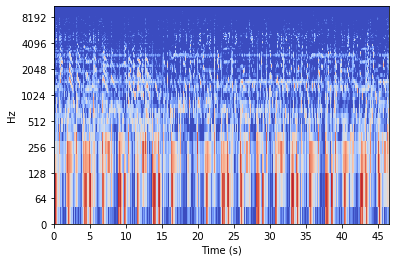

In [16]:
ps = spec_out[1]
librosa.display.specshow(ps, x_axis='s', y_axis='log')

# Add AWGN to Signal
https://medium.com/analytics-vidhya/adding-noise-to-audio-clips-5d8cee24ccb8

In [8]:
def get_white_noise(signal,SNR) :
    #RMS value of signal
    RMS_s=math.sqrt(np.mean(signal**2))
    #RMS values of noise
    RMS_n=math.sqrt(RMS_s**2/(pow(10,SNR/10)))
    #Additive white gausian noise. Thereore mean=0
    #Because sample length is large (typically > 40000)
    #we can use the population formula for standard daviation.
    #because mean=0 STD=RMS
    STD_n=RMS_n
    noise=np.random.normal(0, STD_n, signal.shape[0])
    return noise

In [9]:
def get_spectogram(x_sr_list, SNR):
    log_mel_w_noise_list = []
    x_with_noise_list = []
    for i in tqdm(x_sr_list):
#         x, sr = i[0], i[1]
        x, sr = i, 44100

        x_with_noise = x + get_white_noise(x,SNR)

        stft_w_noise = np.abs(librosa.stft(x_with_noise, n_fft=2048, hop_length=512))
        mel_w_noise = librosa.feature.melspectrogram(sr=sr, S=stft_w_noise**2)
        log_mel_w_noise = librosa.amplitude_to_db(mel_w_noise)
        
        # Maintain List of Perturbed Data
        log_mel_w_noise_list.append(log_mel_w_noise[:,:2000])
#         x_with_noise_list.append(x_with_noise)

    return log_mel_w_noise_list #, x_with_noise_list

In [10]:
log_mel_noise = get_spectogram(lib_out, 5)

100%|██████████| 7997/7997 [28:37<00:00,  4.77it/s]


# Pkl Log Mel Spectogram With Noise

In [11]:
f_name_1 = '/scratch/jw6254/unziptest/pkl_files/noisy_log_mel_spec.pkl'

with open(f_name_1, 'wb') as f:
    pickle.dump(log_mel_noise, f)

# Shuffle the list of Regular Log Mel Spectograms to be used as Negatives

In [12]:
with open(log_mel_spec, 'rb') as f:
    spec_out = pickle.load(f)

In [13]:
def Cloning(li1): 
    li_copy = li1[:] 
    return li_copy

In [15]:
spec_copy = Cloning(spec_out)

random.shuffle(spec_copy)

In [17]:
f_name_2 = '/scratch/jw6254/unziptest/pkl_files/shuffled_log_mel_spec.pkl'

with open(f_name_2, 'wb') as f:
    pickle.dump(spec_copy, f)